# Сборный проект: Исследование потенциально популярного продукта на рынке игр

Интернет-магазине «Стримчик»  продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель проекта**: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования:** 
1. Обзор данных
2. Предобработка
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез

Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import warnings
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv') 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Первый взгляд на данные позволяет увидеть стратегию предобработки: нужно заменить названия столбцов (нижний регистр), заменить типы данных в нужных столбцах и обработать пропуски

## Предобработка данных

In [5]:
df.rename(columns = {'Name' : 'name', 'Platform' : 'platform', 'Year_of_Release' : 'year_of_release', 
                    'Genre' : 'genre', 'Other_sales' : 'other_sales', 'Critic_Score' : 'critic_score',
                    'User_Score' : 'user_score', 'Rating' : 'rating'}, inplace = True)
df

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Названия остальных столбцов менять не нужно, так легче воспринимать значения данных, обозначающие регион пользователя

Обработаем пропуски перед заменой типов данных, чтобы избежать ошибок

In [6]:
print(df.isna().sum())
df = df.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

# пропуски в столбце с рейтингом нужно заменить на -1, это обозначение отсутствия данных
# при условии, что все значения положительные

name                  2
platform              0
year_of_release     269
genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [7]:
print(df.isna().sum())
print(df.duplicated().sum())

name                  0
platform              0
year_of_release       0
genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64
0


In [8]:
# строки тоже необходимо привести к нижнему регистру
for column_name in ["name", "platform", 'genre']:
    df[column_name] = df[column_name].str.lower()
df.head()

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
#df = df.fillna(value={'critic_score': -1, 'user_score': -1, 'rating': 'unknown'})
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan
df = df.fillna(value={'critic_score': -1, 'user_score': -1, 'rating': 'unknown'})
df.head()

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,-1.0,-1,unknown
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,-1.0,-1,unknown


Такая замена позволит максимально возможно использовать необходимые данные для анализа, строить гистограммы и остальные графики. В столбце rating  встречаются ячейки tbd -это обозначение еще не определенного рейтинга, поэтому заменим на nan

Теперь можно поменять типы данных в столбцах, где это необходимо:
* year_of_release - дата
* user_score - float (скорее всего, эти данные понадобятся для анализа)


In [10]:
df.loc[:,'year_of_release'] = df.loc[:,'year_of_release'].astype('Int64',errors='ignore')
df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Столбец с суммарными продажами в регионах

In [11]:
df['total_sales'] = df[['NA_sales','EU_sales','JP_sales', 'other_sales']].sum(axis = 1)
df

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16440,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,-1.0,-1.0,unknown,0.01
16441,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16442,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,-1.0,-1.0,unknown,0.01


Предобработка завершена: обработаны пропуски, изменены названия столбцов, изменен тип данных в необходимых столбцах. Остались валидные данные для последующего анализа

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?

[Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Продажи, млн копий.'),
 Text(0.5, 1.0, 'Выпуск игр по годам')]

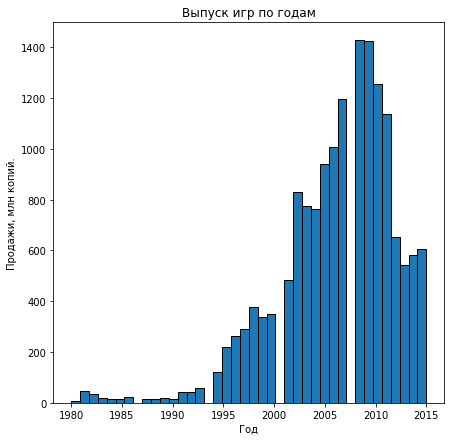

In [12]:
#games_year = df.groupby(['year_of_release']).agg({'name':'count'}).reset_index()
#df_sale = (df.pivot_table(index='year_of_release', values='total_sales', aggfunc=('sum'))).reset_index()
df[df['year_of_release'] != 2016]['year_of_release'].plot(kind='hist', bins=40, ec='black', figsize=(7, 7)).set(xlabel='Год', ylabel='Продажи, млн копий.', title='Выпуск игр по годам')
                            


Готово

В датасете данные с 1980 года, пик популярности выпуска игр приходится на период 2000 - 2015 гг, думаю, что именно эти года наиболее важны для исследования: до 2000-го года игры выпускались, но ПК не было у большинства людей, также заметен спад выпуска игр после 2008 года(возможно, повлиял всемирный кризис, а также масс-адопшен мобильных приложений и игр). Нужно просмотреть на продажи в этот период

In [13]:
sales_pivot = df.pivot_table(index='year_of_release', values='total_sales', aggfunc=('sum')).reset_index()
sales_pivot

,year_of_release,total_sales
0,1980,11.38
1,1981,35.68
2,1982,28.88
3,1983,16.80
4,1984,50.35
5,1985,53.95
6,1986,37.08
7,1987,21.70
8,1988,47.21
9,1989,73.45


### Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [14]:
platform_sales = df.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()

platform_sales.head(27)

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
5,2600,1985,0.45
6,2600,1986,0.67
7,2600,1987,1.94
8,2600,1988,0.74
9,2600,1989,0.63


Цикл для подсчета жизненного цикла платформы: от первого повлияния на рынке до последнего года существования

In [15]:
platform_list = df['platform'].unique().tolist()

data = []
first_year = []
for platform in platform_list:
    lifetime = len(df.loc[df['platform'] == platform,'year_of_release'].unique())
    year = df.loc[df['platform'] == platform,'year_of_release'].min()
    data.append(lifetime)
    first_year.append(year)

In [16]:
platform_list = pd.Series(platform_list, name='platform')
data = pd.Series(data, name='lifetime')
first_year = pd.Series(first_year, name='first_year')

platforms_lifetime = pd.concat([platform_list, data, first_year],axis=1)

platforms_lifetime = platforms_lifetime.sort_values(by='lifetime')
platforms_lifetime.tail()

,platform,lifetime,first_year
4,x360,12,2005
1,nes,12,1983
16,psp,12,2004
2,gb,13,1988
14,pc,26,1985


In [17]:
# топ-10 платформ:
top_10_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
top_10_platforms

platform
ps2     1233.56
x360     961.24
ps3      931.34
wii      891.18
ds       802.78
ps       727.58
ps4      314.14
gba      312.88
psp      289.53
3ds      257.81
Name: total_sales, dtype: float64

['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', '3ds']


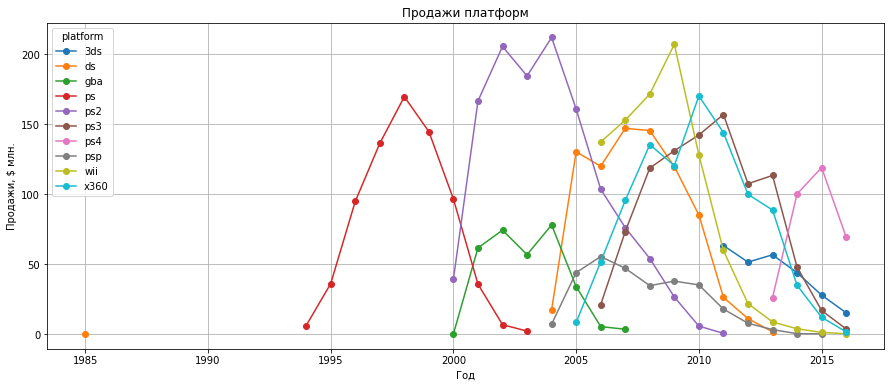

In [18]:
top_10_platforms_names = [i for i in top_10_platforms.index]
print(top_10_platforms_names)
sales_top_10_platform = (df.query('platform == @top_10_platforms_names')
                           .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
                           .plot(style='o-', grid= True, legend=True, figsize=(15,6))
                           .set(xlabel='Год', ylabel='Продажи, $ млн.', title='Продажи платформ')
                            )

Видим странную аномалию у DS, посмотрела дату выпуска первой игры - это 1985 год,  тогда данная платформа продала 0, 02 млн копий, затем был долгий перерыв до 2004 года

In [19]:
platforms_lifetime.median()

lifetime         7.0
first_year    1996.0
dtype: float64

Для расчета среднего срока жизи платформы используется медиана, которая менее чувствительна от выбросов. Получено значение - 7 лет. При этом из графика выше видно, что все платформы, независимо от периода "жизни" проходят один и тот же жизненный цикл: от первичного размещения, включая пик популярности, до окончательного выход из рынка.

Еще заметна другая оосбенность: ширина распределения срока жизни платформ сужается к настоящему времени, я думаю, что это связано с большим количеством игр и платформ к 2015 году, они быстрее выходят из гонки популярности

Актуальный период должен совпадать с полным жизненным циклом платформы, то есть валидным периодом можно назвать период до полного отмирания продукта - 2012-2015 года

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

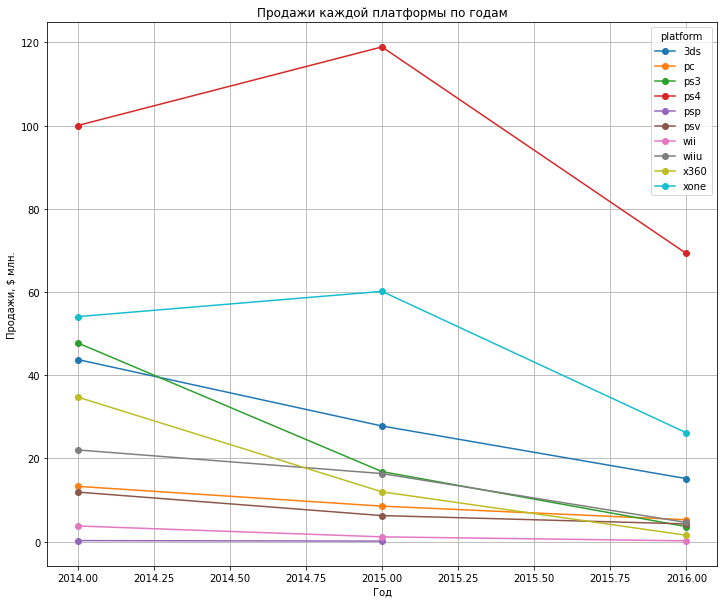

In [20]:
(df.query('year_of_release >= 2014')
   .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
   .plot(style='o-', grid= True, legend=True, figsize=(12,10))
   .set(xlabel='Год', ylabel='Продажи, $ млн.', title='Продажи каждой платформы по годам')
);

Растущими по продажам платформами можно назвать те, тренд которых на графике восходящий: **ps4, xone**

Все оставшиеся платформы к 2015 году проживают последние мгновения своих продаж. Интересно, что платформа  ps3, некогда считающая себя главным конкурентом ps4, в 2011 году продавалась на сумму более 150 млн долларов. Я предполагаю, что тренд для ps4 еще не достиг своего пика, а также продажи пробьют потолок на ближайший горизонт планирования

### график «ящик с усами» по глобальным продажам игр в разбивке по платформам

Для диаграммы размаха не совсем информативно брать только две платформы, проанализируем топ-5 платформ по продажам за выбранный период

In [21]:
#top_5_platforms = ['ps3', 'x360', 'ps4', '3ds', 'xone']
good_platform = (df.query('2014 <= year_of_release')
                     .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
                  )

good_platform['total_sales'] = good_platform.sum(axis=1)
good_platform.sort_values(by='total_sales', ascending=False)



platform,3ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone,total_sales
name,,,,,,,,,,,
call of duty: black ops 3,NaN,0.26,1.69,14.63,NaN,NaN,NaN,NaN,1.70,7.39,25.67
call of duty: advanced warfare,NaN,0.41,4.36,7.66,NaN,NaN,NaN,NaN,4.28,5.26,21.97
grand theft auto v,NaN,1.17,NaN,12.62,NaN,NaN,NaN,NaN,NaN,5.47,19.26
fifa 15,0.46,0.29,4.28,6.08,NaN,0.60,0.56,NaN,2.92,2.18,17.37
fifa 16,NaN,0.20,2.70,8.58,NaN,NaN,NaN,NaN,1.57,3.25,16.30
...,...,...,...,...,...,...,...,...,...,...,...
irotoridori no sekai: world's end re-birth,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,0.01
infinite stratos 2: love and purge,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,0.01
dragon quest x: all in one package,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,0.01


Готово, убрала из query фильтр по топ-5 платформ, оставила только актуальный период (после 2014 года)

In [22]:
good_platform

platform,3ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone,total_sales
name,,,,,,,,,,,
beyblade burst,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03
fire emblem fates,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.67
haikyu!! cross team match!,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04
12-sai. honto no kimochi,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07
12-sai. koisuru diary,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05
...,...,...,...,...,...,...,...,...,...,...,...
yuusha shisu.,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,0.03
zero escape: zero time dilemma,0.08,NaN,NaN,NaN,NaN,0.06,NaN,NaN,NaN,NaN,0.14
zettai kaikyuu gakuen: eden with roses and phantasm,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,0.01


In [23]:
#plt.figure(figsize=(15,10))
#plt.title('Диаграммы размаха для топ-5 платформ')
#sns.boxplot(data=good_platform, orient='h');




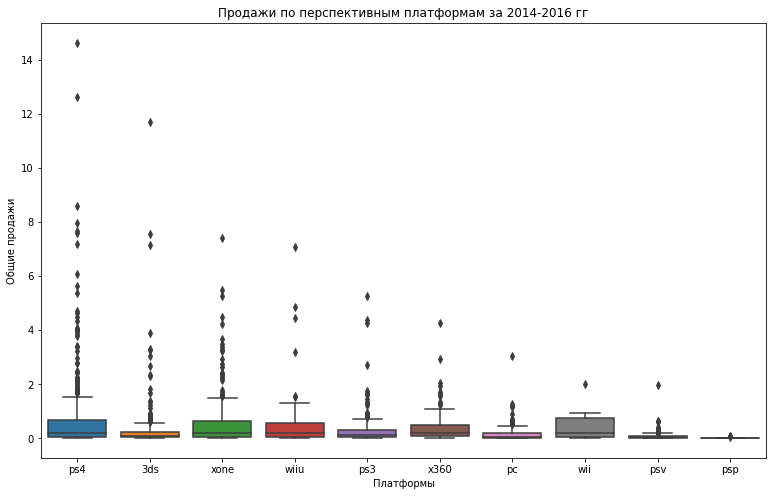

In [24]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = df.query('2014 <= year_of_release'), y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))

plt.show()


По укрупненной картине диаграмм размаха можно проследить наличие выбросов, для информативного анализа диаграммы размаха нужно посмотерть на статистические показатели:

In [25]:
good_platform.describe()

platform,3ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone,total_sales
count,212.000000,151.000000,219.000000,376.000000,13.000000,295.000000,11.000000,73.000000,111.000000,228.000000,956.000000
mean,0.408868,0.179139,0.311324,0.766356,0.027692,0.075932,0.460909,0.588767,0.434414,0.615614,0.763023
std,1.188368,0.329359,0.633059,1.614969,0.027735,0.141591,0.625451,1.161467,0.628967,1.046513,2.142993
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.030000,0.020000,0.040000,0.057500,0.010000,0.020000,0.035000,0.050000,0.070000,0.050000,0.030000
50%,0.090000,0.060000,0.110000,0.185000,0.020000,0.040000,0.180000,0.190000,0.180000,0.205000,0.110000
75%,0.250000,0.200000,0.325000,0.690000,0.020000,0.090000,0.755000,0.570000,0.505000,0.632500,0.442500
max,11.680000,3.050000,5.270000,14.630000,0.090000,1.960000,2.010000,7.090000,4.280000,7.390000,25.670000


У всех платформ присутсвует среднеквадратическое отклонение, этим объясняется наличие "хвостов" на диаграммах размаха. У самой перспективной платформы ps4 очень сильно разнятся среднее и медиана. Максимальные продажи по одной из игр зафиксированы у платформы х360. По Медианному значению продаж лидирует xone. Для изучения факторов, влияющих на продажи, ноебходимо расчитать корреляцию

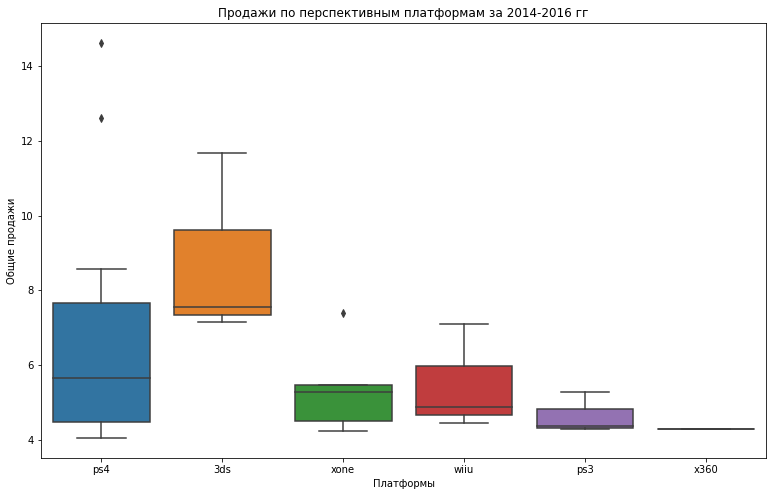

In [26]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = df.query('2014 <= year_of_release and total_sales >= 4'), y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))

plt.show()


По построенной диаграмме размаха для продаж менее 4 млн проданных копий можно сказать, что за актуальный период лидирует платформа 3ds с медианным значением 7 млн копий

Готово

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами

In [27]:
ps4_score = (df.query('2014 <= year_of_release and platform == "ps4" and user_score != -1 and critic_score != -1')
                     .loc[:, ['name', 'critic_score', 'user_score', 'total_sales']])
ps4_score.head(10)

,name,critic_score,user_score,total_sales
42,grand theft auto v,97.0,8.3,12.62
77,fifa 16,82.0,4.3,8.58
92,call of duty: advanced warfare,83.0,5.7,7.66
94,fifa 17,85.0,5.0,7.60
105,fallout 4,87.0,6.5,7.17
143,fifa 15,82.0,5.7,6.08
154,destiny,76.0,6.1,5.64
171,uncharted 4: a thief's end,93.0,7.9,5.39
230,uncharted: the nathan drake collection,86.0,8.1,4.62
244,call of duty: infinite warfare,77.0,3.4,4.47


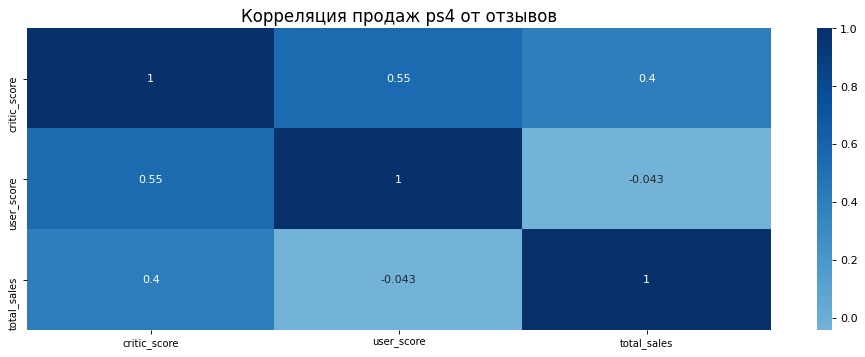

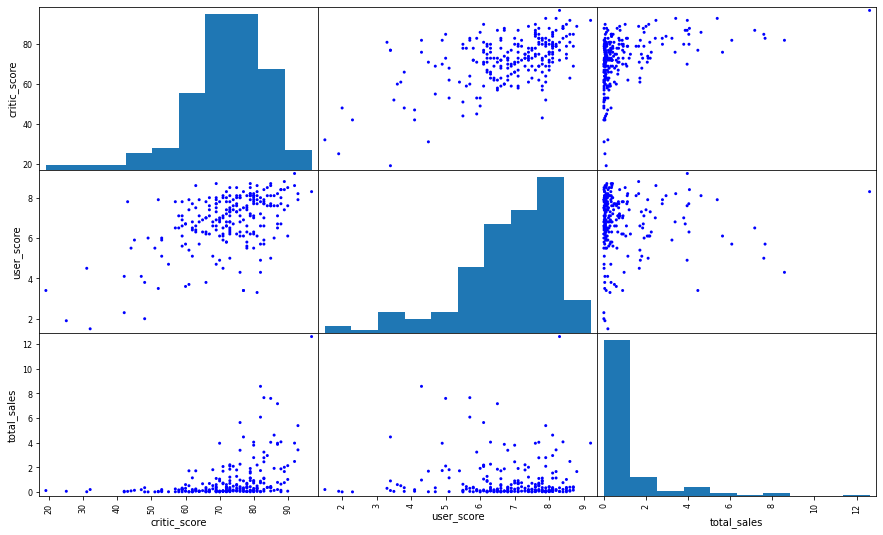

In [28]:
plt.figure(figsize=(15,5), dpi= 80)
sns.heatmap(ps4_score.corr(), xticklabels=ps4_score.corr().columns, yticklabels=ps4_score.corr().columns, cmap='Blues', center=0, annot=True)
plt.title('Корреляция продаж ps4 от отзывов', fontsize=15)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

pd.plotting.scatter_matrix(ps4_score, figsize=(15, 9), alpha=1, c='b');

Была выбрана самая популярная на 2015 год платформа  ps4, по оценке корреляции получилась следующая картина:

* 0.4 для оценки критиков -  средняя зависимость
* -0.043 для оценки пользователей - обраьная связь
Это позволяет сделать вывод, что, в совокупности, оценки критиков и пользователей слабо влияют на продажи
При этом интересно было увидеть сильную корреляцию между оценкой пользователей и критиков - я начала сомневаться в правдивости этих оценок :)

Диаграммы рассеяния позволяют судить о **наличии** связи, но не о силе. Заметно небольшое скопление точек 

### Выводы с продажами игр на других платформах.

,name,critic_score,user_score,total_sales
165,grand theft auto v,97.0,7.9,5.47
179,call of duty: advanced warfare,81.0,5.4,5.26
241,halo 5: guardians,84.0,6.4,4.49
269,fallout 4,88.0,6.2,4.22
372,assassin's creed: unity,72.0,4.1,3.50
...,...,...,...,...
16058,agatha christie's the abc murders,66.0,7.5,0.01
16125,goat simulator,53.0,6.3,0.01
16326,saints row: gat out of hell,65.0,6.0,0.01
16359,sébastien loeb rally evo,63.0,8.2,0.01


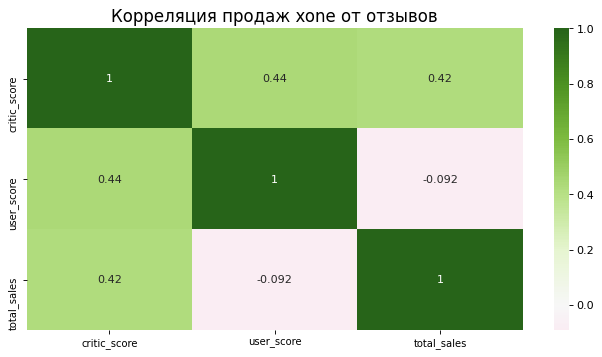

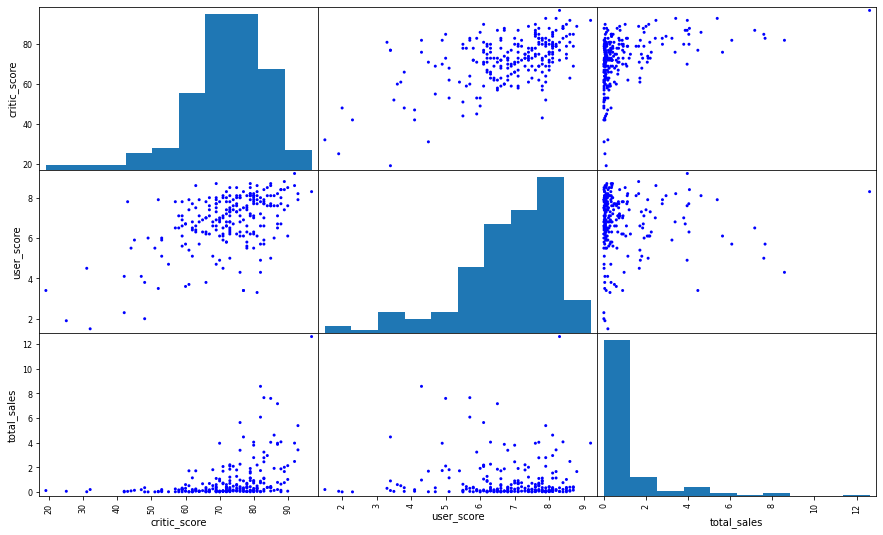

In [29]:
xone_score = (df.query('2014 <= year_of_release and platform == "xone" and user_score != -1 and critic_score != -1')
                     .loc[:, ['name', 'critic_score', 'user_score', 'total_sales']])

display(xone_score)
plt.figure(figsize=(10,5), dpi= 80)
sns.heatmap(xone_score.corr(), xticklabels=xone_score.corr().columns, yticklabels=xone_score.corr().columns, cmap='PiYG', center=0, annot=True)
plt.title('Корреляция продаж xone от отзывов', fontsize=15)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

pd.plotting.scatter_matrix(ps4_score, figsize=(15, 9), alpha=1, c='b');


,name,critic_score,user_score,total_sales
1517,assassin's creed: rogue,72.0,7.5,1.28
1534,dark souls ii,91.0,8.1,1.28
2208,the lego movie videogame,80.0,6.8,0.93
2220,south park: the stick of truth,85.0,8.5,0.93
2576,wwe 2k15,55.0,3.1,0.78
3226,2014 fifa world cup brazil,73.0,4.3,0.61
3255,borderlands: the pre-sequel,77.0,6.3,0.62
3368,metal gear solid v: ground zeroes,66.0,5.9,0.58
4427,naruto shippuden: ultimate ninja storm revolution,73.0,7.5,0.44
4432,mlb 14: the show,81.0,6.8,0.43


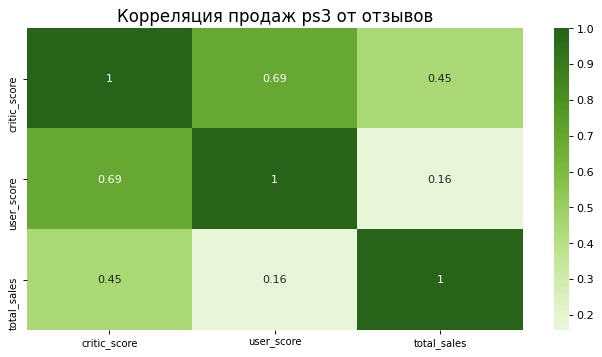

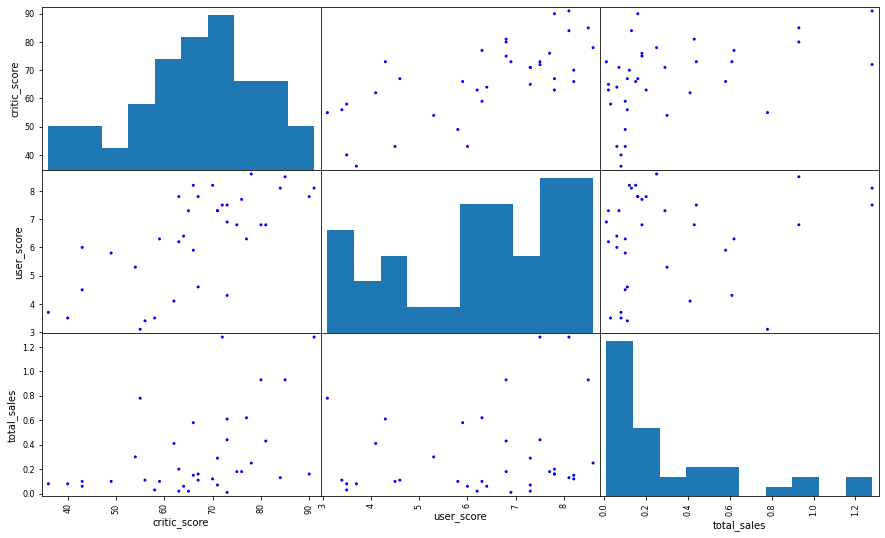

In [30]:
ps3_score = (df.query('2014 <= year_of_release and platform == "ps3" and user_score != -1 and critic_score != -1')
                     .loc[:, ['name', 'critic_score', 'user_score', 'total_sales']])

display(ps3_score)
plt.figure(figsize=(10,5), dpi= 80)
sns.heatmap(ps3_score.corr(), xticklabels=ps3_score.corr().columns, yticklabels=ps3_score.corr().columns, cmap='PiYG', center=0, annot=True)
plt.title('Корреляция продаж ps3 от отзывов', fontsize=15)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

pd.plotting.scatter_matrix(ps3_score, figsize=(15, 9), alpha=1, c='b');

В целом, картина по двум другим популярным платформам не сильно меняется: связь между продажами и оценкой критиков/пользователей в среднем составляет 0.4, что гооврит о средней зависимости

### Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [31]:
good_df = df.query('2014 <= year_of_release')
good_df

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,-1.0,-1.0,unknown,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16436,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16439,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16441,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01


In [32]:
genre_pivot = (good_df.groupby(['genre']).agg({'total_sales':'sum'})
                   .sort_values(by='total_sales', ascending=False))
genre_pivot             

,total_sales
genre,
action,199.36
shooter,170.94
sports,109.48
role-playing,101.44
misc,37.55
fighting,28.22
racing,27.52
platform,18.09
adventure,17.55


[Text(0.5, 0, 'total_sales'), Text(0, 0.5, 'genre')]

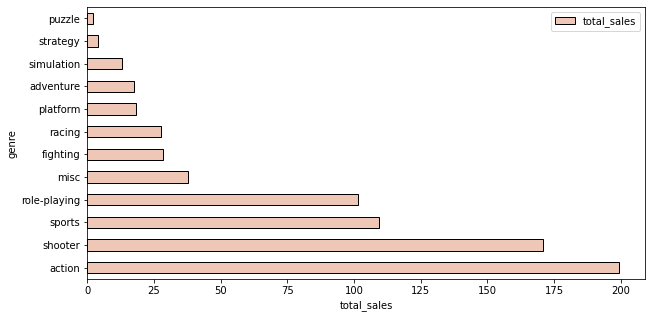

In [33]:
genre_pivot.plot(kind='barh', figsize=(10, 5), ec='black', color='#d867').set(xlabel='total_sales', ylabel='genre')

Самый продаваемый жанр игр - экшн, он сильно отбивается от остальной массы жанров. Меньше всего продаж зафиксировано у жанров puzzle и strategy

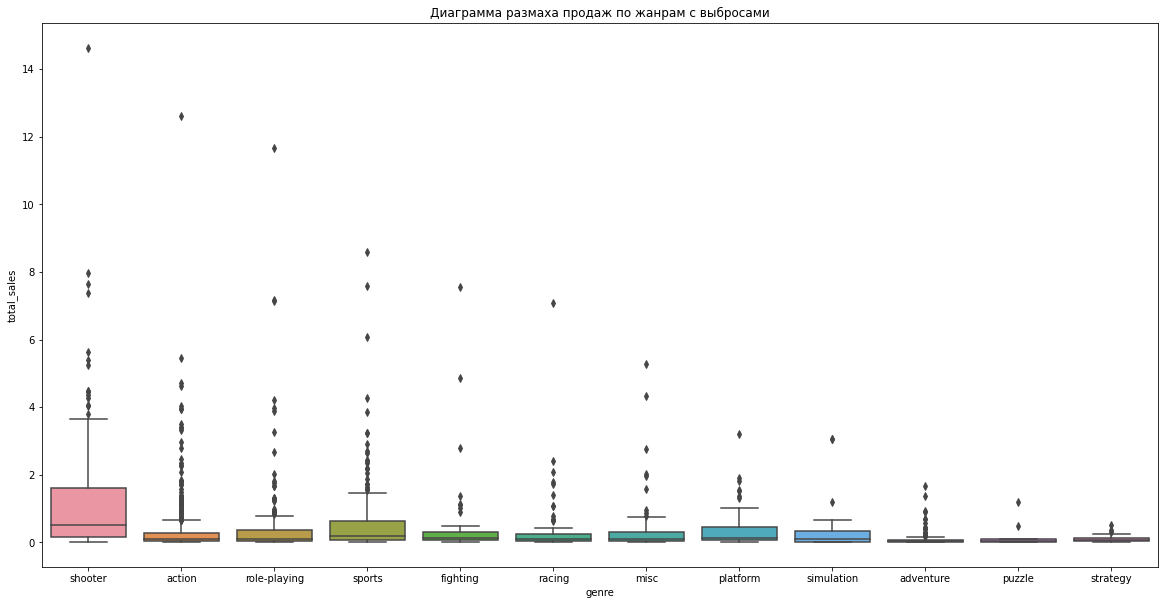

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=good_df, x='genre', y='total_sales')

plt.title('Диаграмма размаха продаж по жанрам с выбросами')
plt.show()

Бессмысленно анализировать подобную диаграмму размаха, на которой видны только выбросы, поэтому добавила showfliers=False, чтобы посмотреть на чистые данные

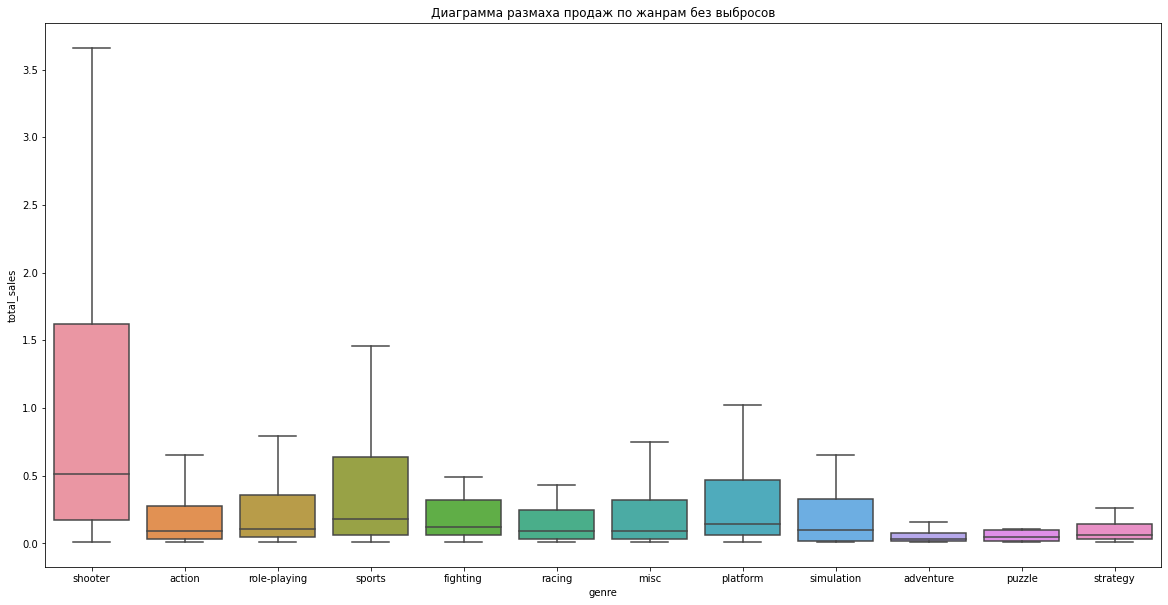

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=good_df, x='genre', y='total_sales', showfliers=False)
plt.title('Диаграмма размаха продаж по жанрам без выбросов')
#plt.ylim(0.05)


plt.show()

По диаграмме размаха видна верхняя граница продаж для каждого жанра - это примерно 0,25 млн копий. Можно сказать, что с 2014 года активно продаются на широкую аудиторию жанры шутер(стрелялки), спортивные соревнования, платформс. При этом медианные продажи для аутсайдерских жанров (надеюсь, так можно говорить) схожи вместе с собой - 0.125 млн копий (за исключением шутеров, для этого жанра медианные продажи составляют чуть больше полумиллиона копий)

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

  platform  NA_sales
3      ps4     98.61
9     xone     81.27
8     x360     28.30
0      3ds     22.64
2      ps3     22.05


array([<AxesSubplot:ylabel='NA_sales'>], dtype=object)

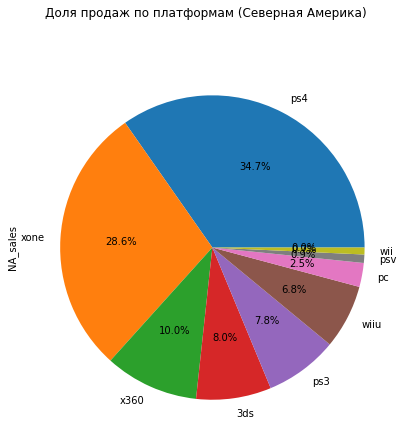

In [36]:
na_platform = good_df.groupby(['platform']).agg({'NA_sales':'sum'}).reset_index().sort_values(by='NA_sales', ascending=False).head(5)
print(na_platform)
good_df.groupby(by='platform').agg({'NA_sales':'sum'}).sort_values(by='NA_sales', ascending=False).head(10).plot(autopct='%1.1f%%', kind='pie', title='Доля продаж по платформам (Северная Америка)', legend=False, subplots=True, figsize=(7, 7))


Для Северной Америки преобладают такие платформы, как x360, ps4, xone, 3ds, ps3

  platform  EU_sales
3      ps4    130.04
9     xone     46.25
2      ps3     25.54
1       pc     17.97
0      3ds     16.12


array([<AxesSubplot:ylabel='EU_sales'>], dtype=object)

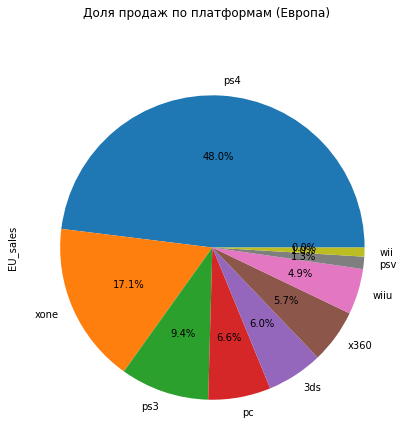

In [37]:
eu_platform = good_df.groupby(['platform']).agg({'EU_sales':'sum'}).reset_index().sort_values(by='EU_sales', ascending=False).head(5)
print(eu_platform)
good_df.groupby(by='platform').agg({'EU_sales':'sum'}).sort_values(by='EU_sales', ascending=False).head(10).plot(autopct='%1.1f%%', kind='pie', title='Доля продаж по платформам (Европа)', legend=False, subplots=True, figsize=(7, 7))


Немного отличается картина для европейских пользователей, здесь популярны: самая популярная платформа здесь ps4, далее xone, ps3, pc, 3ds



  platform  JP_sales
0      3ds     44.24
3      ps4     15.02
5      psv     14.54
2      ps3     11.22
7     wiiu      7.31


array([<AxesSubplot:ylabel='JP_sales'>], dtype=object)

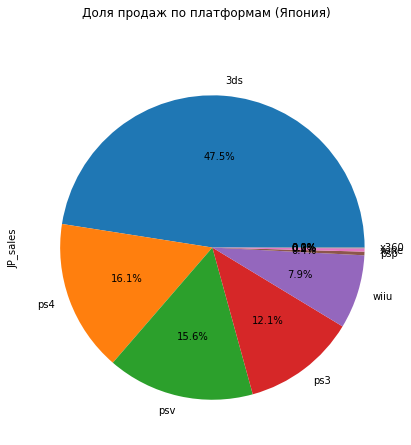

In [38]:
jp_platform = good_df.groupby(['platform']).agg({'JP_sales':'sum'}).reset_index().sort_values(by='JP_sales', ascending=False).head(5)
print(jp_platform)
good_df.groupby(by='platform').agg({'JP_sales':'sum'}).sort_values(by='JP_sales', ascending=False).head(10).plot(autopct='%1.1f%%', kind='pie', title='Доля продаж по платформам (Япония)', legend=False, subplots=True, figsize=(7, 7))


Идеальная круговая диаграмма для разделения топ-5 популярных платформ: в Японии характерны 3ds, ps4, psv, ps3, wiiu. На первый взгляд пользователи азиатского региона сильно отличаются от Европы и Северной Америки

#### Выводы по платформам



Исследуемые три региона (Северная Америка, Европа и Япония) различаются между собой по предпочтениям в игровых платформах, особенно сильно выделяется Япония: 3ds и ds составляют 40%, я предполагаю, что это объясняется культурным особенностям. 

Для Америки и Европы топ-2 платформы - xone и ps4, различие только в том, что для первого региона продажи составили 490 (xone), а для Европы - 292 (ps4) млн копий соответственно.

P.S. Загуглила про 3ds и ds - это портативные консоли, которые носят с собой огромное количество японцев. Я бы хотела проанализировать возрастные группы пользователей)) Они просто много работают, поэтому у японцев нет времени играть в игры на других платформах, для которых нужен телевизор или же нужен второй игрок (надеюсь, я не затронула обидные стереотипы)

### Самые  популярные жанры (топ-5) 

In [39]:
na_genre = good_df.groupby(['genre']).agg({'NA_sales':'sum'}).reset_index().sort_values(by='NA_sales', ascending=False)
print('ТОП-5 жанров Северной Америки')
display(na_genre.head(5))

eu_genre = good_df.groupby(['genre']).agg({'EU_sales':'sum'}).reset_index().sort_values(by='EU_sales', ascending=False).head(5)
print('ТОП-5 жанров Европы')
display(eu_genre.head(5))

jp_genre = good_df.groupby(['genre']).agg({'JP_sales':'sum'}).reset_index().sort_values(by='JP_sales', ascending=False).head(5)
print('ТОП-5 жанров Японии')
display(jp_genre.head(5))

other_genre = good_df.groupby(['genre']).agg({'other_sales':'sum'}).reset_index().sort_values(by='other_sales', ascending=False)
print('ТОП-5 жанров других регионов')
display(other_genre.head(5))



ТОП-5 жанров Северной Америки


,genre,NA_sales
8,shooter,79.02
0,action,72.53
10,sports,46.13
7,role-playing,33.47
3,misc,15.05


ТОП-5 жанров Европы


,genre,EU_sales
0,action,74.68
8,shooter,65.52
10,sports,45.73
7,role-playing,28.17
6,racing,14.13


ТОП-5 жанров Японии


,genre,JP_sales
7,role-playing,31.16
0,action,29.58
2,fighting,6.37
3,misc,5.61
8,shooter,4.87


ТОП-5 жанров других регионов


,genre,other_sales
0,action,22.57
8,shooter,21.53
10,sports,14.36
7,role-playing,8.64
3,misc,4.03


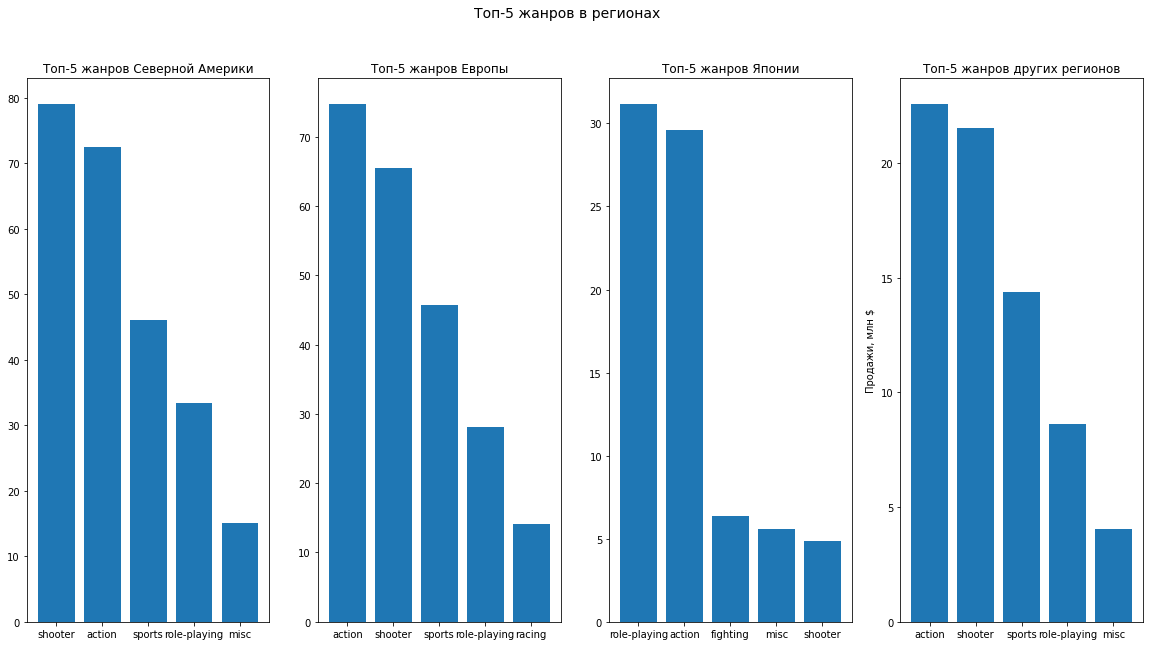

In [40]:
plt.figure(figsize=(20, 10))

plt.subplot(141)
x=na_genre['genre'].head()
y=na_genre['NA_sales'].head()
plt.bar(x,y)
plt.title('Топ-5 жанров Северной Америки')

plt.subplot(142)
x=eu_genre['genre'].head()
y=eu_genre['EU_sales'].head()
plt.bar(x,y)
plt.title('Топ-5 жанров Европы')

plt.subplot(143)
x=jp_genre['genre'].head()
y=jp_genre['JP_sales'].head()
plt.bar(x,y)
plt.title('Топ-5 жанров Японии')

plt.subplot(144)
x=other_genre['genre'].head()
y=other_genre['other_sales'].head()
plt.bar(x,y)
plt.title('Топ-5 жанров других регионов')

plt.suptitle("Топ-5 жанров в регионах", fontsize=14)
plt.ylabel('Продажи, млн $')
plt.show()


#### Выводы по жанрам


Картина по жанрам для Северной Америки и Европы абсолютно одинаковая: экшн, шутеры и спорт входят в топ-3, при продажи в Америке экшен-игр составляют 424 млн проданных копий, в Европе 299 соответственно

Япония снова выделяется, здесь характерны role-playing игры как самые популярные, оставшиеся топы такие же, как и у выше упомянутых регионов. Еще хочется отметить появление жанра platform

Для оставшихся регионов ситуация с жанрами напоминает селекцию Европы и Америки: жанр экшен продается больше всего (более 22 млн копий)


### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

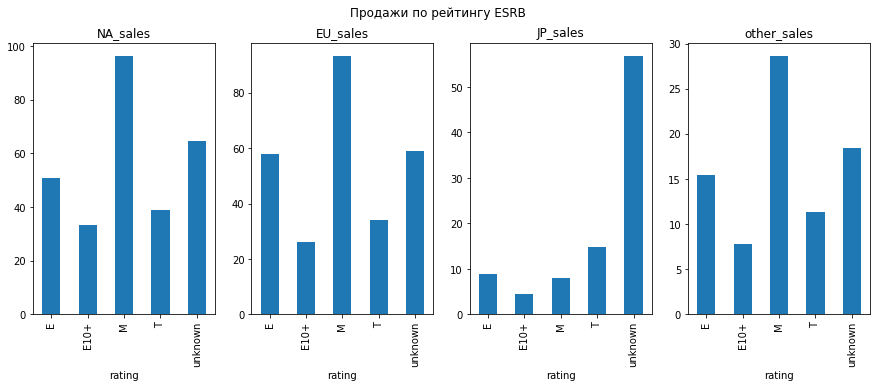

In [41]:
sales = ['NA_sales', 'EU_sales', 'JP_sales', 'other_sales']
countries = ['C-A', 'Europe','Japan', 'other']
fig, axs = plt.subplots(1,4, figsize=(15,5))
fig.suptitle('Продажи по рейтингу ESRB')
for i, sale in enumerate(sales):
    for country in countries:
        good_df.groupby('rating')[sale].sum().plot(kind='bar', ax=axs[i], title=sale)

Информация из гугла:
* Е - подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика (FIFA)
* Е10+ - Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft
* EC - Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует.
* M - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков.
* RP - Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB
* T - Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.

Максимальный рейтинг ESRB в Северной Америке по продадам игр составляет категория для всех возрастных категорий, например, FIFA.
Похожая картина в Европе: превосходит категория М

В Японии также выделяется категория Е

Во всех регионах присутствует категория unknown, которую я раннее заменила с пустого значения, она обозначает игры без рейтинга

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для выбора статистического теста необходимо посчитать медианы выборок и проверить на нормальность распределения

In [42]:
xone_user = good_df.query('platform == "xone" and user_score != -1')
pc_user = good_df.query('platform == "pc" and user_score != -1')
#xone_user #
print(xone_user['user_score'].mean())
print(pc_user['user_score'].mean())


6.594545454545456
6.298360655737705


Так как размерность выборок по платформам разная, то необходимо проанализировать медианы. Они отличаются на десятые доли, для расчета статистических показателей создала функцию, сравним дисперсии

In [43]:
#def platform_stat(data, column):
 #   mean = np.mean(data[column])
  #  variance = np.var(data[column], ddof=1)
   # standard_deviation = np.std(data[column], ddof=1)
    #print ('Среднее: {:.1f}'.format(mean), '\n' 
     #      'Дисперсия: {:.1f}'.format(variance), '\n'
      #     'Стандартное отклонение: {:.1f}'.format(standard_deviation)
       #   )
#platform_stat(xone_user, 'user_score')


In [44]:
#platform_stat(pc_user, 'user_score')

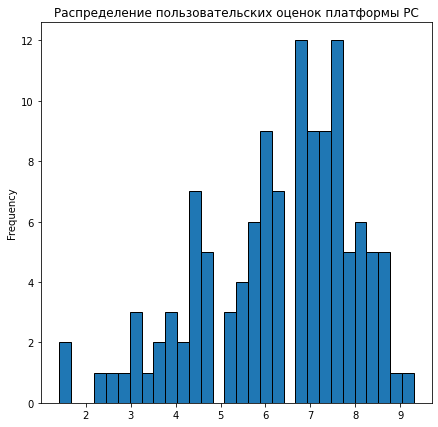

Text(0.5, 1.0, 'Pаспределение пользовательских оценок платформы Xone')

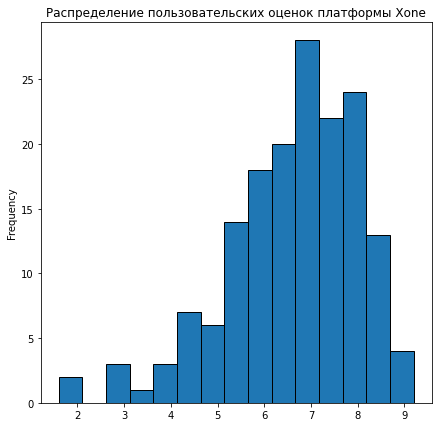

In [45]:
pc_user['user_score'].plot(kind='hist', bins=30, ec='black', figsize=(7, 7)).set_title('Pаспределение пользовательских оценок платформы РС')
plt.show()
xone_user['user_score'].plot(kind='hist', bins=15, ec='black', figsize=(7, 7)).set_title('Pаспределение пользовательских оценок платформы Xone')


Выборки распределены не по закону Гаусса (по гистограмме видны  хвосты слева - низкие оценки пользователей, выбросы и эксцессы (вытянутость вверх)), это не необходимое условие для проведения теста Стьюдента, поэтому применим т-тест для проверки гипотез

Хорошо, спасибо за статью! поменяла

Нулевая гипотеза: средние пользовательские рейтингы платформ одинаковые

Альтернативная: средние пользовательские рейтингы платформ не равны

In [46]:
xone_user.dropna(subset=['user_score'], inplace=True)
pc_user.dropna(subset=['user_score'], inplace=True)

/tmp/ipykernel_392/262820502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xone_user.dropna(subset=['user_score'], inplace=True)
/tmp/ipykernel_392/262820502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_user.dropna(subset=['user_score'], inplace=True)


In [47]:
pc_user['user_score'].isna().sum()

0

done

In [48]:
alpha = .01 # критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу
nan_policy='omit'

xone = xone_user['user_score']
pc = pc_user['user_score']
results = st.ttest_ind(xone, pc, equal_var = False)
print('Средний пользовательский рейтинг платформы Хone:', xone_user['user_score'].mean())
print('Средний пользовательский рейтинг платформы РС:', pc_user['user_score'].mean())
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")


Средний пользовательский рейтинг платформы Хone: 6.594545454545456
Средний пользовательский рейтинг платформы РС: 6.298360655737705
p-значение: 0.11601398086668827
Не отвергаем нулевую гипотезу


Полученные данные о проверке гипотезы о равенстве средних пользователских оценок платформ могут гооврить о том, что несмотря на разный уровень продаж у платформ xone и  pc отклик у пользователей примерно одинаковый, именно об этом и говорит значение pvalue, как я это понимаю: если мы возьмем не одну, а 100 выборок, то по каждой мы можем провести отдельный тест и получить случайную величину p-value (100 раз разную). Если мы задали уровень значимости 0.05 и у нас реально нет отличия в средних, то можно ожидать, что в 5 случаях p-value будет достаточно малым, чтобы мы отвергли H0 и допустили ошибку 1-го рода. При этом p-value для ситуаций, когда мы не отвергнем H0 будет случайно болтаться в промежутке от 1 до 0.05.

Это означает, что с вероятностью 11,6% можно отвергнуть нулевую гипотезу, при условии, если она верна

### Средние пользовательские рейтинги жанров Action и Sports  разные

In [50]:
action_user = good_df.query('genre == "action" and user_score != -1') #1208
sports_user = good_df.query('genre == "sports" and user_score != -1') #673
#platform_stat(action_user, 'user_score')

In [51]:
#platform_stat(sports_user, 'user_score')

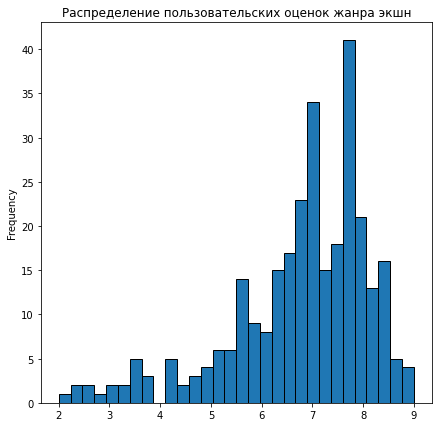

Text(0.5, 1.0, 'Pаспределение пользовательских оценок жанра спорт')

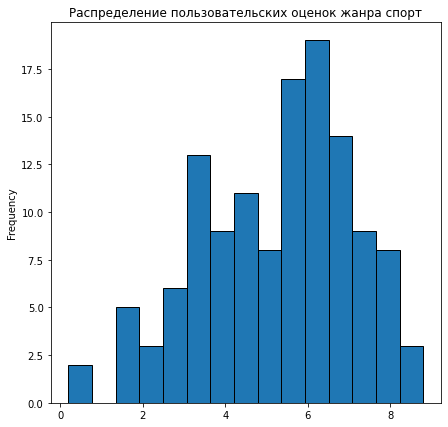

In [52]:
action_user['user_score'].plot(kind='hist', bins=30, ec='black', figsize=(7, 7)).set_title('Pаспределение пользовательских оценок жанра экшн')
plt.show()
sports_user['user_score'].plot(kind='hist', bins=15, ec='black', figsize=(7, 7)).set_title('Pаспределение пользовательских оценок жанра спорт')


In [53]:
action_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 42 to 16421
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             297 non-null    object 
 1   platform         297 non-null    object 
 2   year_of_release  297 non-null    Int64  
 3   genre            297 non-null    object 
 4   NA_sales         297 non-null    float64
 5   EU_sales         297 non-null    float64
 6   JP_sales         297 non-null    float64
 7   other_sales      297 non-null    float64
 8   critic_score     297 non-null    float64
 9   user_score       297 non-null    float64
 10  rating           297 non-null    object 
 11  total_sales      297 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 30.5+ KB


In [54]:
action_user = action_user[~action_user['user_score'].isnull()] 
sports_user = sports_user[~sports_user['user_score'].isnull()] 
#action_user['user_score'].isna().sum()
#action_user['user_score'].dropna(['user_score'], inplace=True)
#sports_user['user_score'].dropna(['user_score'], inplace=True)

Удалила пропуски, почему-то дроп не работал, хоть и тип данных в столбце с рейтингом числовой. Тем не менее, дисперсии разные, проверим распределения на нормальность: большиснтво оценок достаточно высокие, именно поэтому присутствует достаточное смещение вправо, по совокупности показателей и гистограмм можно сделать вывод, что выборки распределены не по закону Гаусса. Также применяем тест Стьюдента

Нулевая гипотеза: средние пользовательские оценки жанров разные

Альтернативная: средние пользовательские оценки жанров одинаковые

In [55]:
alpha = .01 # критический уровень  значимости

nan_policy='omit'

action = action_user['user_score']
sports = sports_user['user_score']
results = st.ttest_ind(action, sports, equal_var = False)
print('Средний пользовательский рейтинг жанра Action:', action_user['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports:', sports_user['user_score'].mean())
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")


Средний пользовательский рейтинг жанра Action: 6.760606060606061
Средний пользовательский рейтинг жанра Sports: 5.2251968503937
p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Действительно, средние оценки пользователей по жанрам разнятся

##   Выводы
Закончен Сборный проект-1 по изучению рынка игровых платформ по нескольким регионам. Была проведена предобработка данных, в ходе которой обработаны пропуски и заменены типы данных, в исследовательском анализе данных рассчитаны метрики по продажам.

Составлен типичный портрет пользователя каждого региона по платформам и жанрам. Оказалось, что в разных частях света игроки сильно различаются по предпочтениям, особенно выделяется Япония: в основном, здесь популярна платформа 3ds, которая выпускает портативные консоли и ролевые игры, для остальных регионов характерны жанры экшен и спортивные соревнования на платформах xone и ps4 - последняя вышла совсем недавно, стоит сделать акцент именно на ней

В целом, рынок находится в тенденции уменьшения объема продаж, это связпно с появлением конкуренции в виде мобильных игр, это вполне скажется на ближайший горизонт планирования.

Проверены две гипотезы, установлено, что средние пользовательские рейтинги XBox One и PC не отличаются и средние пользовательские рейтинги жанров Асtion и Sports разные, данные гипотезы проверялись с помощью статистического теста Стьюдента с уровнем значимости 0.01

Для планирования продаж и внедрения рекламных кампаний стоит особое внимание уделить топ-5 популярным жанрам (спортивные соревнования, стрелялки, ролевые игры), в частности Action, а также ориентироваться на рейтинги ESRB на категорию М.